# In Class Assignment 3 - ME 364 (Spring 2022)

<font color='red'>__Question (1)__ </font>: Fit the function $y=\frac{\sqrt{4ax+1}-1}{2b}$, where $a$ and $b$ are constants, to 0.1 percent strain per second data set. Follow the steps described above to find the coefficients and print them and also plot the training data, test data, and fitted line on the same plot.

Evaluate the model you developed and compare its mean squared error and r-squared score with the second model developed in the class notebook.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

In [1]:
xlsx ='https://raw.githubusercontent.com/MasoudMiM/ME_364/master/StrainRate_CorticalBone/Cortical_Bone.xlsx'
df = pd.read_excel(xlsx,sheet_name='StrainRate_0.1', names=['Strain %','Stress (MPa)'])            

df.head()

,Strain %,Stress (MPa)
0,0.039124,8.887767
1,0.057538,10.833070
2,0.075990,14.445776
3,0.094442,18.058482
4,0.112894,21.671188


 a = 2.094, b = 156.864


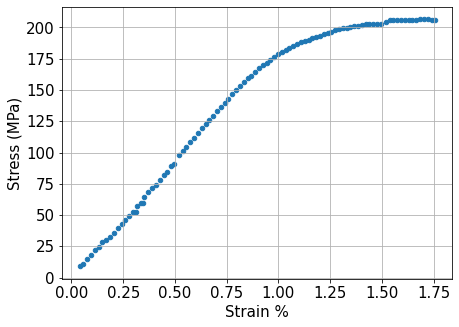

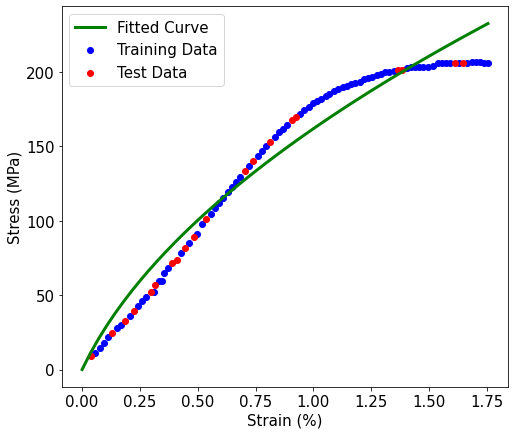

In [5]:
plt.rcParams['font.size'] = '15'
df.plot(kind='scatter',x='Strain %',y='Stress (MPa)',figsize=(7,5))
plt.grid(True)


x_data=df['Strain %']
y_data=df['Stress (MPa)']

x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,shuffle=True)


def my_func(x,a,b):
  output=(np.sqrt((4*a*x)+1)-1)/2*b
  return output

popt, pcov = curve_fit(my_func, x_train, y_train)


print(f" a = {popt[0]:.3f}, b = {popt[1]:.3f}")

yhat=my_func(x_test, popt[0], popt[1])

plt.rcParams['font.size'] = '15'
plt.figure(figsize=(8,7))

#Plotting data
plt.scatter(x_train,y_train,color='blue',label='Training Data')
plt.scatter(x_test,y_test,color='red',label='Test Data')

# Plot fitted curve
xplot=np.linspace(0,max(x_train),num=50)
yplot=my_func(xplot,popt[0],popt[1])
plt.plot(xplot,yplot,color='green', lw=3,label='Fitted Curve')
plt.xlabel('Strain (%)')
plt.ylabel('Stress (MPa)')
plt.legend(loc='best');

In [6]:
MSETst=mean_squared_error(y_test,yhat)
print(f'The value of mean squared error is: {MSETst:0.5f}')

r2scoreTst = r2_score(y_test,yhat)
print(f'The value of R2 is: {r2scoreTst:0.5f}')

The value of mean squared error is: 141.60643
The value of R2 is: 0.96628


<font color='red'>__Question (2)__</font>: Train a regression model with a 3rd degree polynomial to predict elongation using tensile strength (tension strength). Follow the steps in the class notebook to print the coefficients and plot the fitted line, training data, and test data on the same plot.

Find the relative squared error for both test data and training data for the model you developed. 


In [11]:
url = 'https://raw.githubusercontent.com/MasoudMiM/ME_364/main/3D_Printer_Data/3DPrinterDataset.csv'   # Link to the 3D printer data set
df2 = pd.read_csv(url)

df2.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


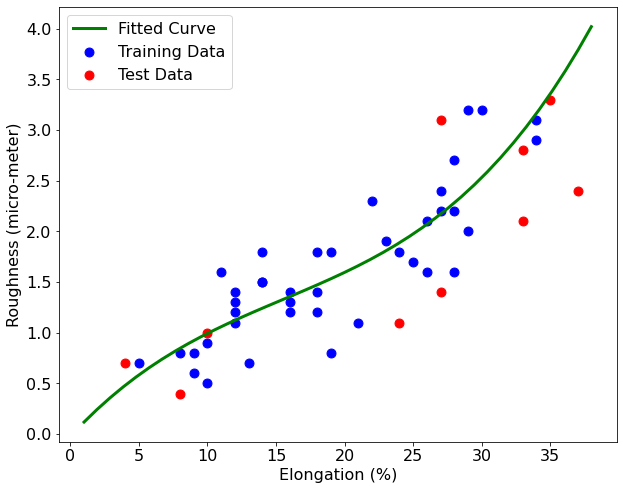

In [13]:
x_dataPoly=np.array(df2[['tension_strenght']])
y_dataPoly=np.array(df2[['elongation']])

x_trainP,x_testP,y_trainP,y_testP=train_test_split(x_dataPoly, y_dataPoly, test_size=0.2, random_state=125)

poly3 = PolynomialFeatures(degree=3) 
x_train_transformedP3 = poly3.fit_transform(x_trainP)
x_test_transformedP3 = poly3.fit_transform(x_testP)
lmPoly3 = LinearRegression()
lmPoly3.fit(x_train_transformedP3, y_trainP)

# Predictions
yhatP3t=lmPoly3.predict(x_test_transformedP3)
yhatP3Tr=lmPoly3.predict(x_train_transformedP3)

# Plot fitted curve
plt.figure(figsize=(10,8))
plt.rc('font',size=16)
xplotP=np.linspace(1,38,num=40)
yplotP3=lmPoly3.intercept_[0]+lmPoly3.coef_[0][1]*xplotP+lmPoly3.coef_[0][2]*xplotP**2+lmPoly3.coef_[0][3]*xplotP**3
plt.plot(xplotP,yplotP3,color='green', lw=3, label='Fitted Curve')

# Plot data
plt.scatter(x_trainP,y_trainP,color='blue',s=80, label='Training Data')
plt.scatter(x_testP,y_testP,color='red',s=80, label='Test Data')
plt.xlabel('Elongation (%)')
plt.ylabel('Roughness (micro-meter)')
plt.legend(loc='best');